# Let's make a water table map!

### Goals:

By the end of this notebook, you should be able to:

- import and sort data from excel
- transform from latitude/longitude to cartesian grid
- create a contour map
- understand the basics of how kriging works
- create a semivariogram model and use it to interpolate between data points
- interpolate your data onto a grid and derive flux vectors from water table height and permeability values
- modify the problem and code

### Mathematical tools used:

- Coordinate system transformation
- 2D Kriging statistics
- Derivation of gradiants and fluxes


### List of software used:

- <a href="https://github.com/bsmurphy/PyKrige">PyKrige</a>, Kriging Toolkit for Python
- <a href="https://pandas.pydata.org/">Pandas</a>, Python Data Analysis Library
- <a href="http://matplotlib.org/">Matplotlib</a>, a python package used for plotting the results
- <a href="http://www.numpy.org/">Numpy</a>, a python package for linear algebra

## Before we do anything, import the necessary packages

In [0]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import matplotlib.pyplot as plt
import matplotlib.tri as tri
from matplotlib import cm
import numpy as np
from IPython.display import HTML
import time

from scipy.stats import norm
from scipy.spatial.distance import pdist, squareform
from scipy.optimize import curve_fit
from scipy.sparse import diags
from scipy.linalg import block_diag
import warnings
warnings.filterwarnings('ignore')
#import sympy as sym

## Use pandas to import data from excel

In [0]:
# REPLACE THIS WITH YOUR URL
url = 'https://github.com/paulsouthard1/WaterTable/blob/master/TOC_File_Test.xlsx?raw=true'
df_wells = pd.read_excel(url, sheet_name='Well_Data')

The data is read into our code as a Pandas dataframe. The following lines create numpy arrays from the excel columns based on the header names. The '.values' tag transforms the data from a pandas dataframe to a numpy array that is compatible with the functions we use later. <font color=red> Add in a line (line 8) to import elevation data from the 'topo_data' excel sheet - assign it to the variable 'elevation'. </font> 

*Note - we take the log10 of the permeability to make it easier and more intuitive to work with and plot. Real permeability values are so low they are in the range of machine error...*

In [0]:
x_wells = df_wells['Easting'].values
y_wells = df_wells['Northing'].values
elevation = df_wells['WL'].values


### Then for the topography/head data

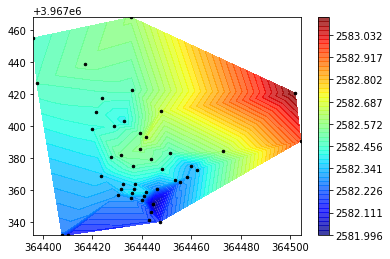

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
triang = tri.Triangulation(x_wells, y_wells)

Z = elevation
Zmin, Zmax = Z.min(), Z.max()
contour_steps = 50
levels = np.linspace(Zmin, Zmax, num = contour_steps, endpoint = True)
cpf_wells = ax1.tricontourf(triang, Z, levels, cmap = cm.jet, alpha=.75)
ax1.plot(x_wells, y_wells, '.k', ms=5)
fig.colorbar(cpf_wells)


fig.savefig('WTMap.png', fmt = 'png', dpi = 200)
